In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree

In [4]:
data=pd.read_csv('hiring.csv')
data

,experience,test_score(out of 10),interview_score(out of 10),salary($)
0,NaN,8.0,9,50000
1,NaN,8.0,6,45000
2,five,6.0,7,60000
3,two,10.0,10,65000
4,seven,9.0,6,70000
5,three,7.0,10,62000
6,ten,NaN,7,72000
7,eleven,7.0,8,80000


In [5]:
data.experience=data.experience.fillna('zero')

In [6]:
data

,experience,test_score(out of 10),interview_score(out of 10),salary($)
0,zero,8.0,9,50000
1,zero,8.0,6,45000
2,five,6.0,7,60000
3,two,10.0,10,65000
4,seven,9.0,6,70000
5,three,7.0,10,62000
6,ten,NaN,7,72000
7,eleven,7.0,8,80000


In [10]:
import math
t_score=math.floor(mean)
t_score

7

In [8]:
mean=data['test_score(out of 10)'].mean()

In [9]:
mean

7.857142857142857

In [14]:
data['test_score(out of 10)']=data['test_score(out of 10)'].fillna(t_score)

In [15]:
data

,experience,test_score(out of 10),interview_score(out of 10),salary($)
0,zero,8.0,9,50000
1,zero,8.0,6,45000
2,five,6.0,7,60000
3,two,10.0,10,65000
4,seven,9.0,6,70000
5,three,7.0,10,62000
6,ten,7.0,7,72000
7,eleven,7.0,8,80000


In [23]:
pip install word2number

  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for word2number: filename=word2number-1.1-py3-none-any.whl size=5589 sha256=287962597464ae1f265f45eeebd18ae53a46eaec2640c8c5adf597258d618e12
  Stored in directory: c:\users\dell\appdata\local\pip\cache\wheels\5b\79\fb\d25928e599c7e11fe4e00d32048cd74933f34a74c633d2aea6
Successfully built word2number
Note: you may need to restart the kernel to use updated packages.


In [24]:
from word2number import w2n

In [25]:
data.experience=data.experience.apply(w2n.word_to_num)

In [26]:
data

,experience,test_score(out of 10),interview_score(out of 10),salary($)
0,0,8.0,9,50000
1,0,8.0,6,45000
2,5,6.0,7,60000
3,2,10.0,10,65000
4,7,9.0,6,70000
5,3,7.0,10,62000
6,10,7.0,7,72000
7,11,7.0,8,80000


In [27]:
x=data.drop(['salary($)'],axis=1)
x

,experience,test_score(out of 10),interview_score(out of 10)
0,0,8.0,9
1,0,8.0,6
2,5,6.0,7
3,2,10.0,10
4,7,9.0,6
5,3,7.0,10
6,10,7.0,7
7,11,7.0,8


In [28]:
y=data['salary($)']
y

0    50000
1    45000
2    60000
3    65000
4    70000
5    62000
6    72000
7    80000
Name: salary($), dtype: int64

In [29]:
model=DecisionTreeRegressor(max_depth=3)
model

DecisionTreeRegressor(max_depth=3)

In [33]:
model.fit(x,y)

DecisionTreeRegressor(max_depth=3)

In [38]:
model.score(x,y)

0.9956803455723542

In [43]:
y_predict=model.predict(x)
y_predict

array([50000., 45000., 61000., 65000., 71000., 61000., 71000., 80000.])

In [44]:
y_pre1= model.predict([[0,8,9]])
y_pre1

C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


array([50000.])

In [48]:
df=pd.DataFrame({'predicted_y':y_predict,'actual_y':y})
df

,predicted_y,actual_y
0,50000.0,50000
1,45000.0,45000
2,61000.0,60000
3,65000.0,65000
4,71000.0,70000
5,61000.0,62000
6,71000.0,72000
7,80000.0,80000


In [49]:
from sklearn import tree

In [50]:
print(tree.export_text(model))

|--- feature_0 <= 1.00
|   |--- feature_2 <= 7.50
|   |   |--- value: [45000.00]
|   |--- feature_2 >  7.50
|   |   |--- value: [50000.00]
|--- feature_0 >  1.00
|   |--- feature_0 <= 6.00
|   |   |--- feature_0 <= 2.50
|   |   |   |--- value: [65000.00]
|   |   |--- feature_0 >  2.50
|   |   |   |--- value: [61000.00]
|   |--- feature_0 >  6.00
|   |   |--- feature_2 <= 7.50
|   |   |   |--- value: [71000.00]
|   |   |--- feature_2 >  7.50
|   |   |   |--- value: [80000.00]



In [51]:
feature=list(x.columns)

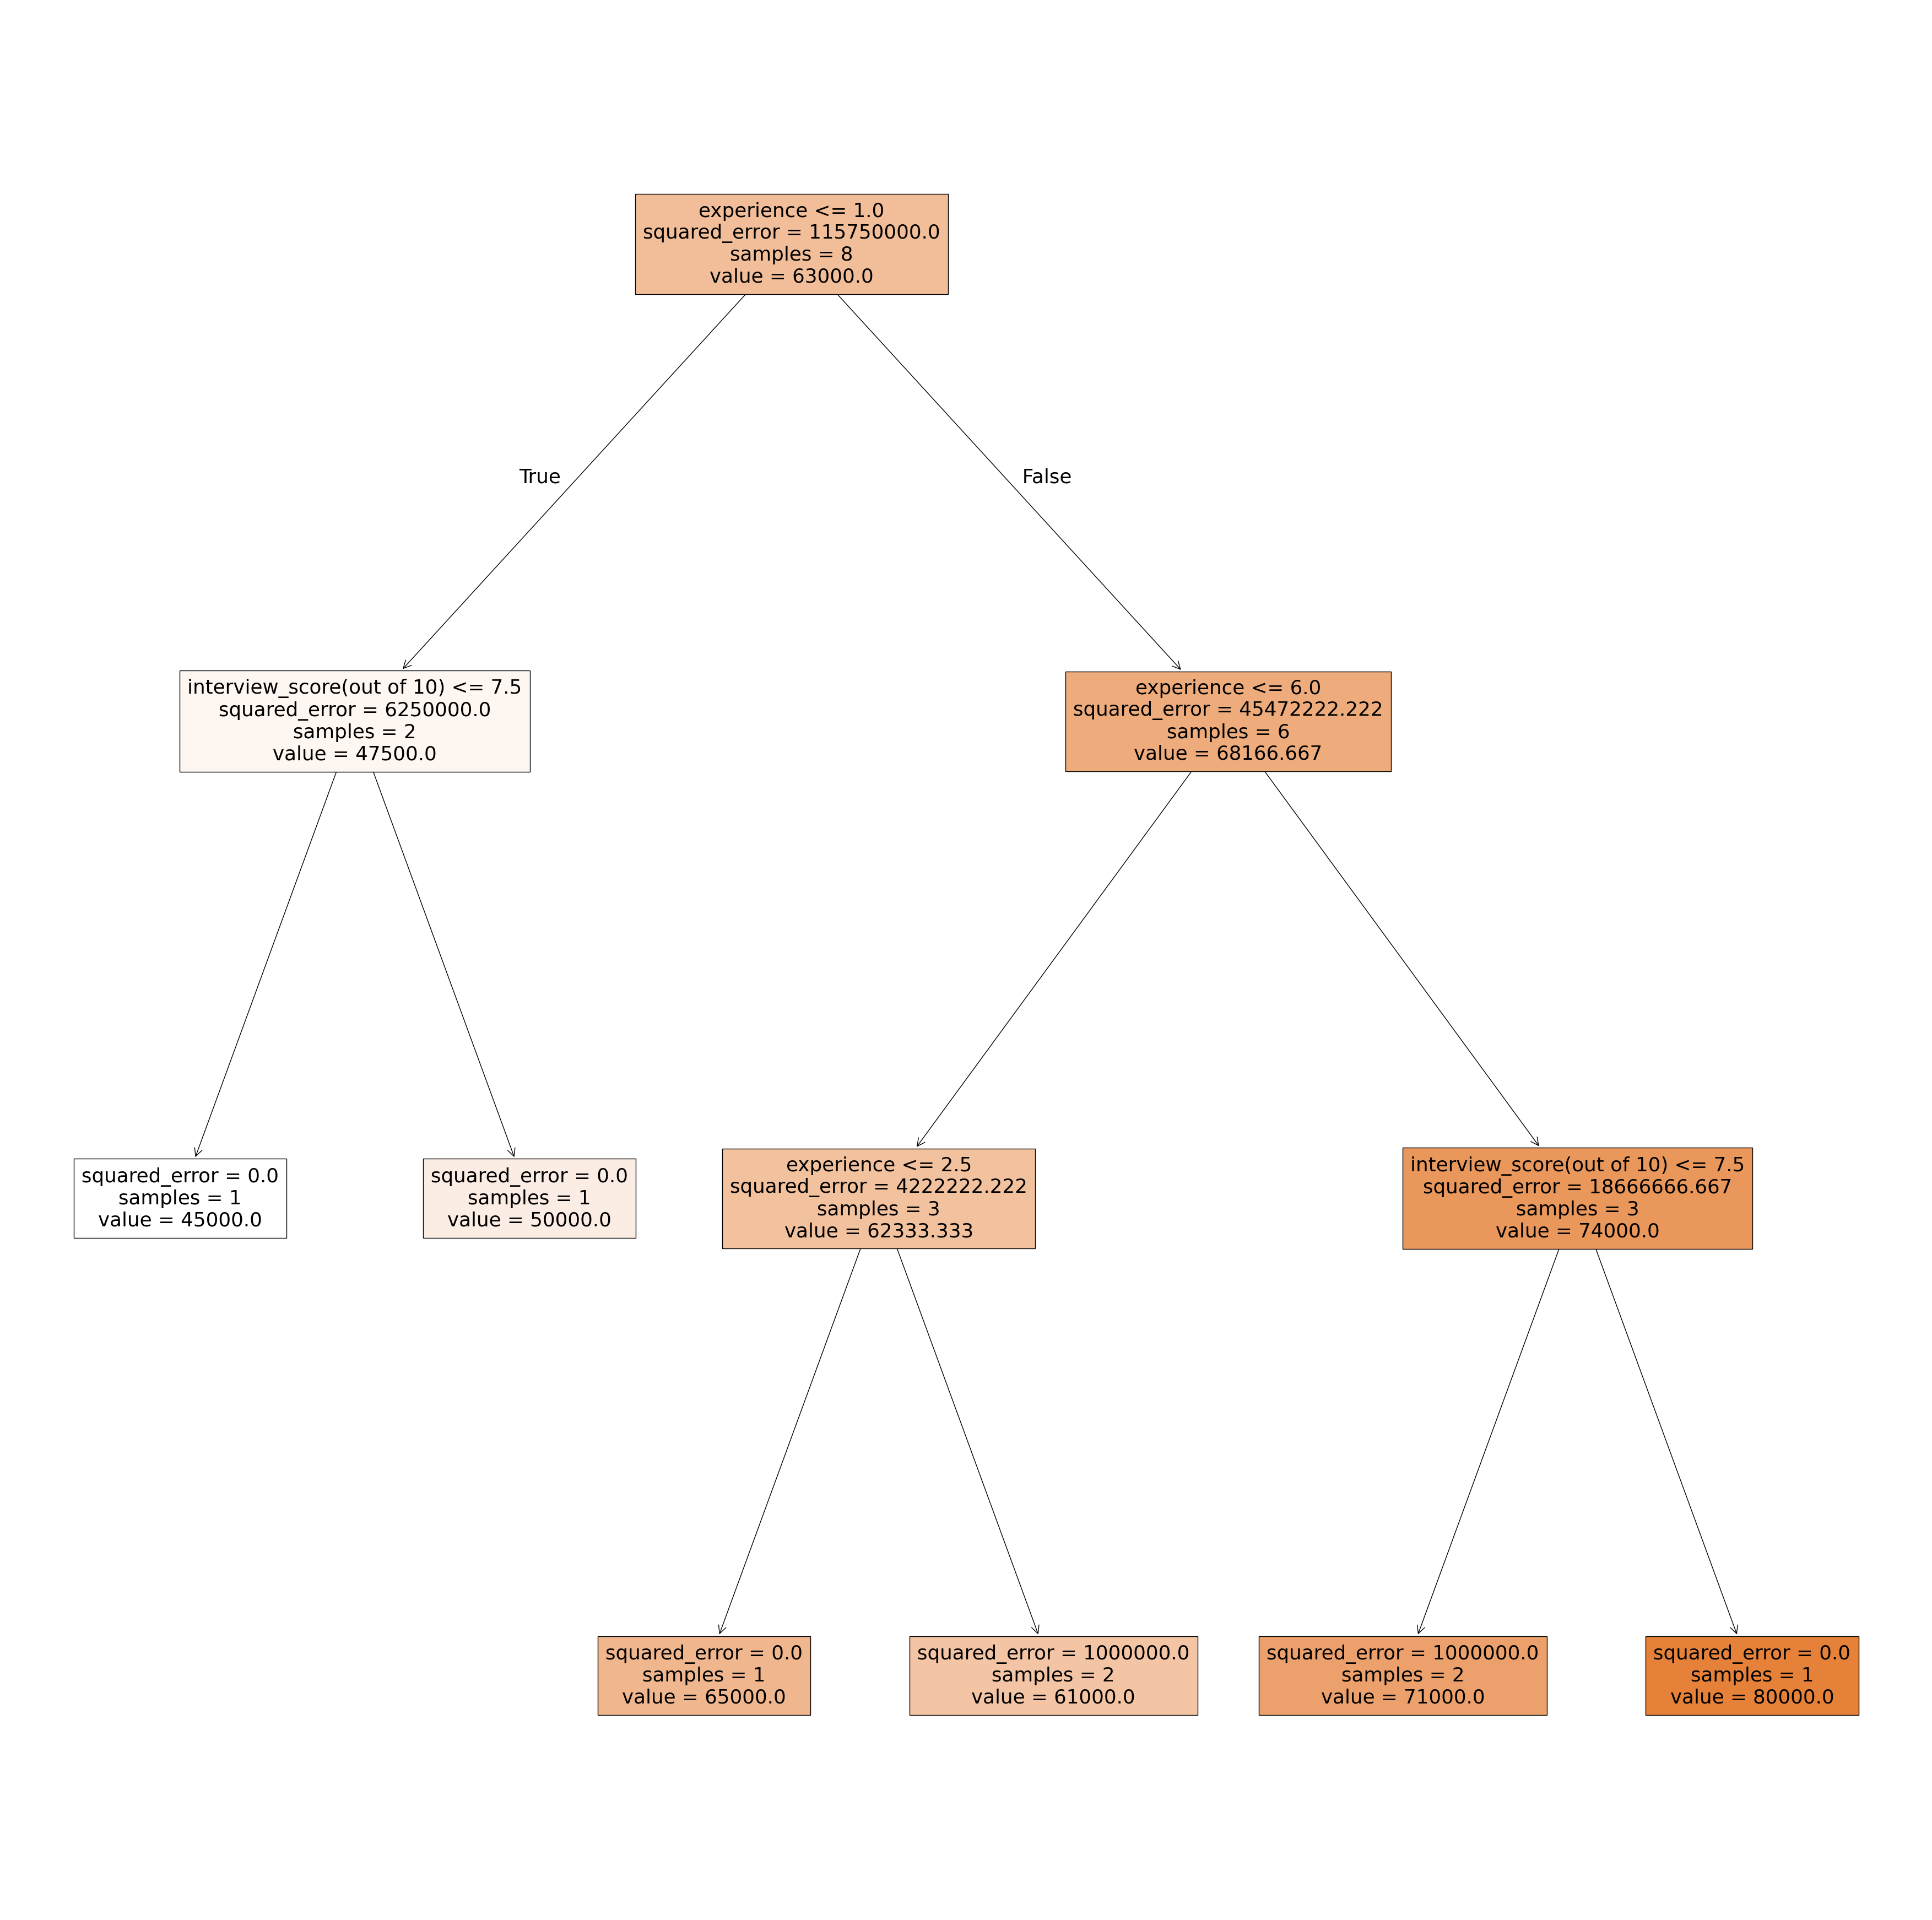

In [52]:
fig=plt.figure(figsize=(45,45))
tree.plot_tree(model,feature_names=feature,filled=True)
plt.show()